In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression

In [2]:
data= pd.read_csv('C:/Users/HARSHA/Downloads/insurance.csv')

In [3]:
data['Benefits']=data['Benefits'] * 100

In [4]:
data.head(10).append(data.tail(10))

,ID,Gender,Marital_status,Dependents,Education,Self_Employed,ApplicantIncome,PremiumAmount,Maturity_Term,Credit_History,Branch,Loan_Status,Benefits
0,IP001002,Male,No,0,Graduate,No,5849,NaN,36.0,1.0,Urban,Y,NaN
1,IP001003,Male,Yes,1,Graduate,No,4583,128.0,36.0,1.0,Rural,N,23900.0
2,IP001005,Male,Yes,0,Graduate,Yes,3000,66.0,36.0,1.0,Urban,Y,8700.0
3,IP001006,Male,Yes,0,Not Graduate,No,2583,120.0,36.0,1.0,Urban,Y,23000.0
4,IP001008,Male,No,0,Graduate,No,6000,141.0,36.0,1.0,Urban,Y,27200.0
5,IP001011,Male,Yes,2,Graduate,Yes,5417,267.0,36.0,1.0,Urban,Y,37700.0
6,IP001013,Male,Yes,0,Not Graduate,No,2333,95.0,36.0,1.0,Urban,Y,20700.0
7,IP001014,Male,Yes,3+,Graduate,No,3036,158.0,36.0,0.0,Semiurban,N,27900.0
8,IP001018,Male,Yes,2,Graduate,No,4006,168.0,36.0,1.0,Urban,Y,27900.0
9,IP001020,Male,Yes,1,Graduate,No,12841,349.0,36.0,1.0,Semiurban,N,572000.0


# EDA

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
ID                 614 non-null object
Gender             601 non-null object
Marital_status     611 non-null object
Dependents         599 non-null object
Education          614 non-null object
Self_Employed      582 non-null object
ApplicantIncome    614 non-null int64
PremiumAmount      592 non-null float64
Maturity_Term      600 non-null float64
Credit_History     564 non-null float64
Branch             614 non-null object
Loan_Status        614 non-null object
Benefits           592 non-null float64
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
data.describe()

,ApplicantIncome,PremiumAmount,Maturity_Term,Credit_History,Benefits
count,614.000000,592.000000,600.000000,564.000000,592.000000
mean,5403.459283,146.412162,34.245000,0.842199,27364.527027
std,6109.041673,85.587325,8.435257,0.364878,41111.661226
min,150.000000,9.000000,3.000000,0.000000,1000.000000
25%,2877.500000,100.000000,36.000000,1.000000,20650.000000
50%,3812.500000,128.000000,36.000000,1.000000,23700.000000
75%,5795.000000,168.000000,36.000000,1.000000,27700.000000
max,81000.000000,700.000000,84.000000,1.000000,720700.000000


In [7]:
data.rename(columns={'ApplicantIncome' : 'Applicant_Income','PremiumAmount' : 'Premium_Amount'},inplace=True)

In [8]:
missing_values_count = data.isnull().sum()
missing_values_count

ID                   0
Gender              13
Marital_status       3
Dependents          15
Education            0
Self_Employed       32
Applicant_Income     0
Premium_Amount      22
Maturity_Term       14
Credit_History      50
Branch               0
Loan_Status          0
Benefits            22
dtype: int64

<AxesSubplot:>

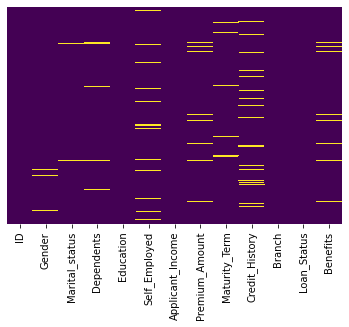

In [9]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
# how many total missing values do we have?
total_cells = np.product(data.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
(total_missing/total_cells) * 100

2.1423202204961163

In [11]:
# replace all NA's the value that comes directly after it in the same column, 
# then replace all the reamining na's with 0
data=data.fillna(method = 'bfill', axis=0).fillna(0)

In [12]:
data.isnull().sum()

ID                  0
Gender              0
Marital_status      0
Dependents          0
Education           0
Self_Employed       0
Applicant_Income    0
Premium_Amount      0
Maturity_Term       0
Credit_History      0
Branch              0
Loan_Status         0
Benefits            0
dtype: int64

<AxesSubplot:>

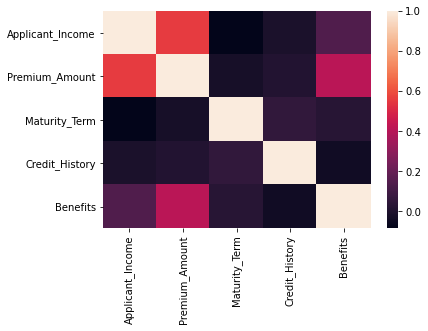

In [13]:
corr = data.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)

In [14]:
# We have to apply encoding in the dataset as there are words present.
# for 'Marrital_status' ,'Education','Self_Employed','Gender' and 'Loan_Status'column we will apply Label Encoding as there are only 2 catagories
# for 'Branch' we will apply OneHot Encoding as there are more than 2 catagories

# Label Encoding:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data.iloc[:, 1] = le.fit_transform(data.iloc[:, 1])
data.iloc[:, 2] = le.fit_transform(data.iloc[:, 2])
data.iloc[:, 3] = le.fit_transform(data.iloc[:, 3])
data.iloc[:, 5] = le.fit_transform(data.iloc[:, 5])
data.iloc[:, 4] = le.fit_transform(data.iloc[:, 4])
data.iloc[:, 11] = le.fit_transform(data.iloc[:, 11])

# OneHot Encoding:

data = pd.get_dummies(data, columns=['Branch'])

In [15]:
data=data.drop(columns=['ID'])

In [16]:
data.head()

,Gender,Marital_status,Dependents,Education,Self_Employed,Applicant_Income,Premium_Amount,Maturity_Term,Credit_History,Loan_Status,Benefits,Branch_Rural,Branch_Semiurban,Branch_Urban
0,1,0,0,0,0,5849,128.0,36.0,1.0,1,23900.0,0,0,1
1,1,1,1,0,0,4583,128.0,36.0,1.0,0,23900.0,1,0,0
2,1,1,0,0,1,3000,66.0,36.0,1.0,1,8700.0,0,0,1
3,1,1,0,1,0,2583,120.0,36.0,1.0,1,23000.0,0,0,1
4,1,0,0,0,0,6000,141.0,36.0,1.0,1,27200.0,0,0,1


In [17]:
Train = data[:500]
Test = data[500:]

In [18]:
trainLabel = np.asarray(Train['Loan_Status'])
trainData = np.asarray(Train.drop('Loan_Status',1))
testLabel = np.asarray(Test['Loan_Status'])
testData = np.asarray(Test.drop('Loan_Status',1))

In [19]:
#normalize our inputs

means = np.mean(trainData, axis=0)
stds = np.std(trainData, axis=0)
 
trainData = (trainData - means)/stds
testData = (testData - means)/stds

In [20]:
InsuranceCheck = LogisticRegression()
InsuranceCheck.fit(trainData, trainLabel)

LogisticRegression()

In [21]:
accuracy = InsuranceCheck.score(testData, testLabel)
print("accuracy = ", accuracy * 100, "%")

accuracy =  80.7017543859649 %


Text(0.5, 0, 'Importance')

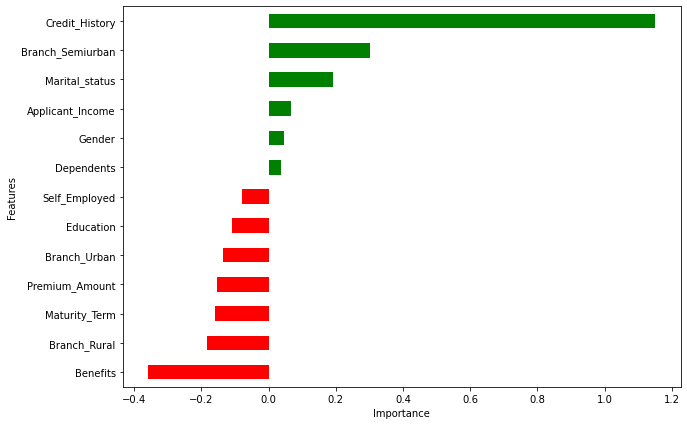

In [22]:
coeff = list(InsuranceCheck.coef_[0])
labels = list(Train.drop('Loan_Status',1).columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(10, 7),color = features.positive.map({True: 'green', False: 'red'}))
plt.xlabel('Importance')

In [23]:
SampleData=data[613:614]
SampleDataFeatures = np.asarray(SampleData.drop('Loan_Status',1))
SampleDataFeatures = (SampleDataFeatures - means)/stds

PredictionProbability = InsuranceCheck.predict_proba(SampleDataFeatures)
Prediction = InsuranceCheck.predict(SampleDataFeatures)
print('Insurance Claim Probability:', PredictionProbability)
print('Insurance Claim Prediction:', Prediction)

Insurance Claim Probability: [[0.84247863 0.15752137]]
Insurance Claim Prediction: [0]


In [24]:
SampleData

,Gender,Marital_status,Dependents,Education,Self_Employed,Applicant_Income,Premium_Amount,Maturity_Term,Credit_History,Loan_Status,Benefits,Branch_Rural,Branch_Semiurban,Branch_Urban
613,0,0,0,0,1,4583,133.0,36.0,0.0,0,25500.0,0,1,0
